✅ Dataset loaded successfully!

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_

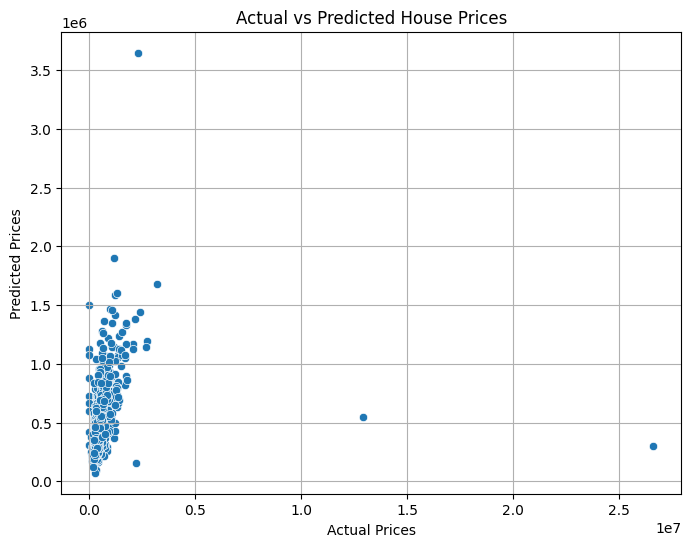

In [3]:
# 🏡 House Price Prediction System - Task 1

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset
data = pd.read_csv("data.csv")  # Adjusted path based on your structure
print("✅ Dataset loaded successfully!\n")

# Step 3: Check Columns and Info
print(data.head())
print("\n📊 Dataset Info:\n")
print(data.info())

# Step 4: Select Relevant Features and Target
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition']
target = 'price'

df = data[features + [target]].dropna()  # Drop missing values

X = df[features]
y = df[target]

# Step 5: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Make Predictions
y_pred = model.predict(X_test)

# Step 8: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📉 Mean Squared Error (MSE): {mse}")
print(f"📈 R² Score: {r2}")

# Step 9: Visualize Predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()


🔎 Descriptive Statistics:

          bedrooms    bathrooms   sqft_living      sqft_lot       floors  \
count  4600.000000  4600.000000   4600.000000  4.600000e+03  4600.000000   
mean      3.400870     2.160815   2139.346957  1.485252e+04     1.512065   
std       0.908848     0.783781    963.206916  3.588444e+04     0.538288   
min       0.000000     0.000000    370.000000  6.380000e+02     1.000000   
25%       3.000000     1.750000   1460.000000  5.000750e+03     1.000000   
50%       3.000000     2.250000   1980.000000  7.683000e+03     1.500000   
75%       4.000000     2.500000   2620.000000  1.100125e+04     2.000000   
max       9.000000     8.000000  13540.000000  1.074218e+06     3.500000   

         condition         price  
count  4600.000000  4.600000e+03  
mean      3.451739  5.519630e+05  
std       0.677230  5.638347e+05  
min       1.000000  0.000000e+00  
25%       3.000000  3.228750e+05  
50%       3.000000  4.609435e+05  
75%       4.000000  6.549625e+05  
max     

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


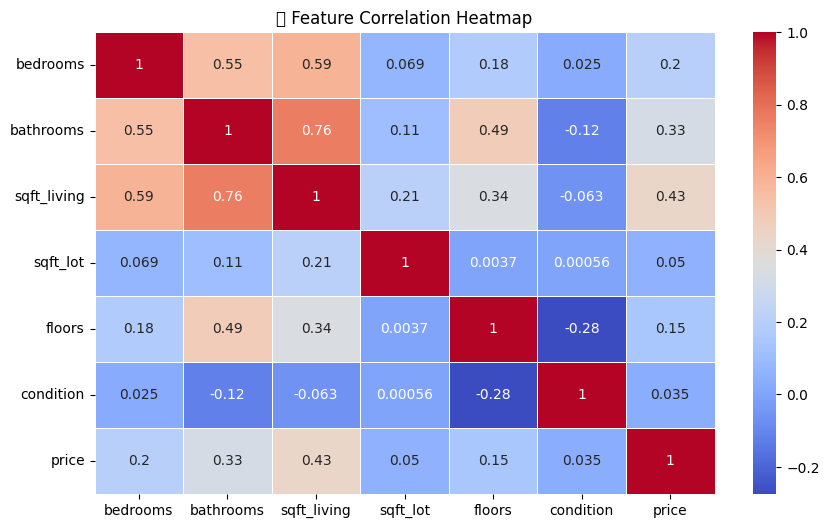

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


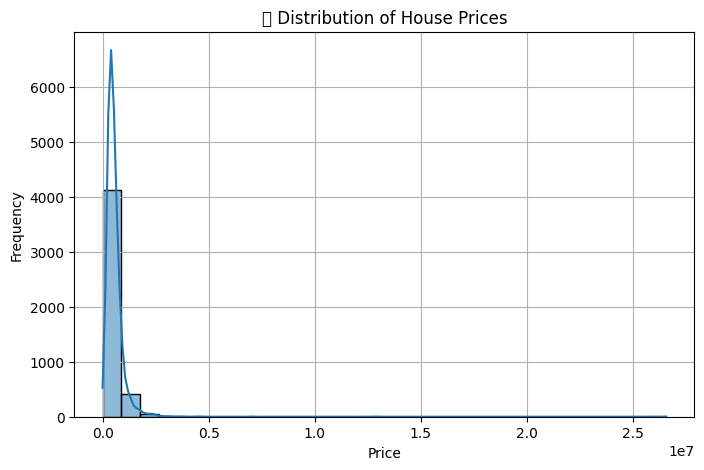

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


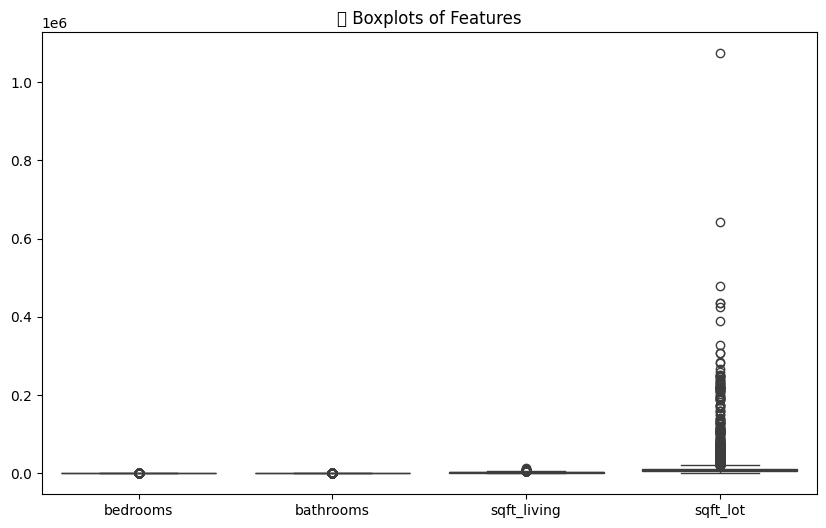

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


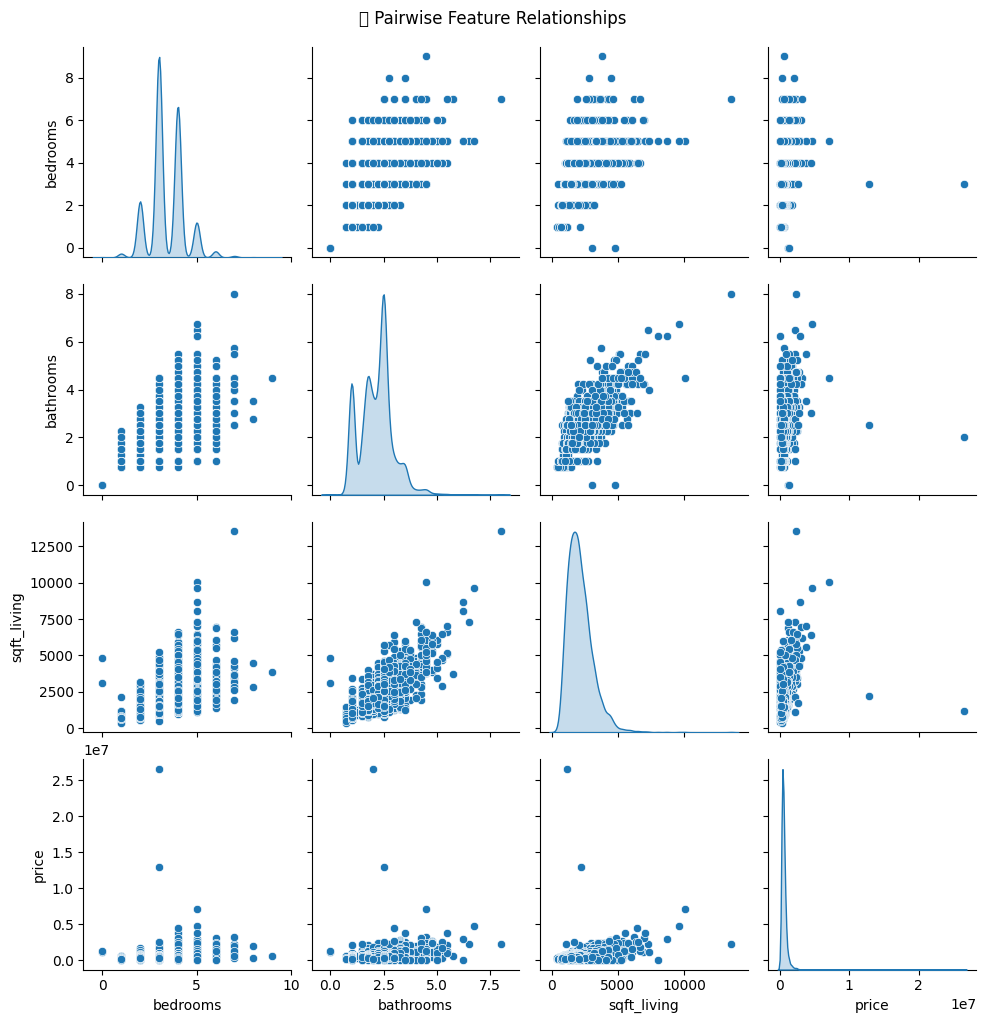

In [4]:
# 🧪 Step: Exploratory Data Analysis (EDA)

# Basic stats
print("🔎 Descriptive Statistics:\n")
print(df.describe())

# Check correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("📊 Feature Correlation Heatmap")
plt.show()

# Distribution of Target Variable (Price)
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=30)
plt.title("🏷️ Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Boxplots for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']])
plt.title("📦 Boxplots of Features")
plt.show()

# Pairplot (Warning: can be heavy!)
sns.pairplot(df[['bedrooms', 'bathrooms', 'sqft_living', 'price']], diag_kind='kde')
plt.suptitle("📌 Pairwise Feature Relationships", y=1.02)
plt.show()


In [5]:
# Mean, Median, Mode of the target variable
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

print(f"📌 Mean Price: {mean_price}")
print(f"📌 Median Price: {median_price}")
print(f"📌 Mode Price: {mode_price}")


📌 Mean Price: 551962.9884732141
📌 Median Price: 460943.46153850004
📌 Mode Price: 0.0


In [6]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("\n🌳 Random Forest Results:")
print(f"📉 MSE: {rf_mse}")
print(f"📈 R² Score: {rf_r2}")



🌳 Random Forest Results:
📉 MSE: 994698081710.7634
📈 R² Score: 0.024658870054921178


In [7]:
print("\n📊 Comparison of Models:")
print(f"Linear Regression R²: {r2}")
print(f"Random Forest R²: {rf_r2}")



📊 Comparison of Models:
Linear Regression R²: 0.03081592061525984
Random Forest R²: 0.024658870054921178


In [8]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, "house_price_model.pkl")
print("✅ Model saved as 'house_price_model.pkl'")


✅ Model saved as 'house_price_model.pkl'


In [9]:
# Load the saved model
model_loaded = joblib.load("house_price_model.pkl")
